In [1]:
import datetime as dt 
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as gp
from plotly.subplots import make_subplots
import yfinance as yf
pyo.init_notebook_mode(connected = True)

In [2]:
end = dt.datetime.now()
start = dt.datetime(2015,1,1)
start,end

(datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2024, 2, 26, 13, 17, 58, 844703))

In [3]:
df = yf.download('NAB.AX',start,end)
df.head()

D:\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2015-01-02  31.858452  31.944065  31.601604  31.925041  18.960514  2002366
2015-01-05  31.953579  32.115295  31.810886  31.972605  18.988764  2934704
2015-01-06  31.677708  31.753811  31.496964  31.715757  18.836224  5487642
2015-01-07  31.449400  31.953579  31.268656  31.791861  18.881418  5774615
2015-01-08  31.982119  32.143837  31.687220  32.077248  19.050913  4590809

In [4]:
df.count()

Open         2316
High         2316
Low          2316
Close        2316
Adj Close    2316
Volume       2316
dtype: int64

In [5]:
df['MA50'] = df['Close'].rolling(window = 50, min_periods = 0).mean()
df['MA200'] = df['Close'].rolling(window = 200, min_periods = 0).mean()
df['MA200'].head(20)

Date
2015-01-02    31.925041
2015-01-05    31.948823
2015-01-06    31.871134
2015-01-07    31.851316
2015-01-08    31.896502
2015-01-09    32.007485
2015-01-12    32.044631
2015-01-13    32.059409
2015-01-14    32.060334
2015-01-15    32.043000
2015-01-16    32.015845
2015-01-19    31.989252
2015-01-20    31.984313
2015-01-21    32.015413
2015-01-22    32.058220
2015-01-23    32.121837
2015-01-27    32.199234
2015-01-28    32.270674
2015-01-29    32.349613
2015-01-30    32.426842
Name: MA200, dtype: float64

In [6]:
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True,
                   vertical_spacing = 0.1, subplot_titles = ("CBA","Volume"),row_width = [0.2,0.7])


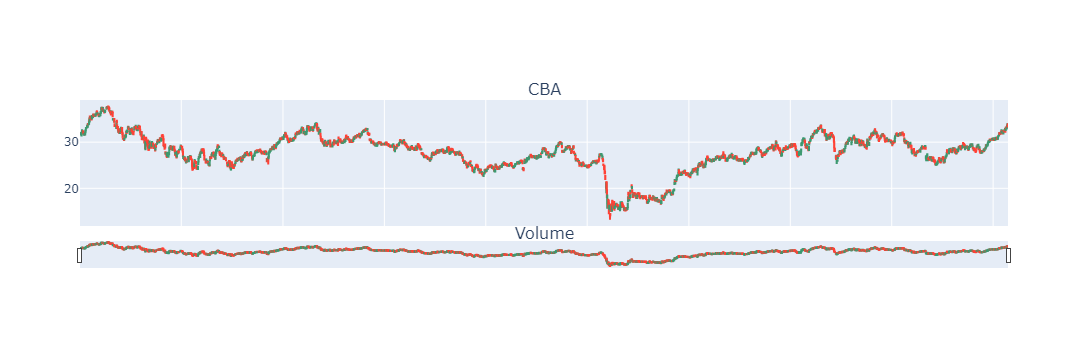

In [7]:
fig.add_trace(gp.Candlestick(x = df.index,open = df['Open'], high = df['High'], low = df['Low'], close = df['Close'], name = 'OHLC' ),row = 1, col = 1)

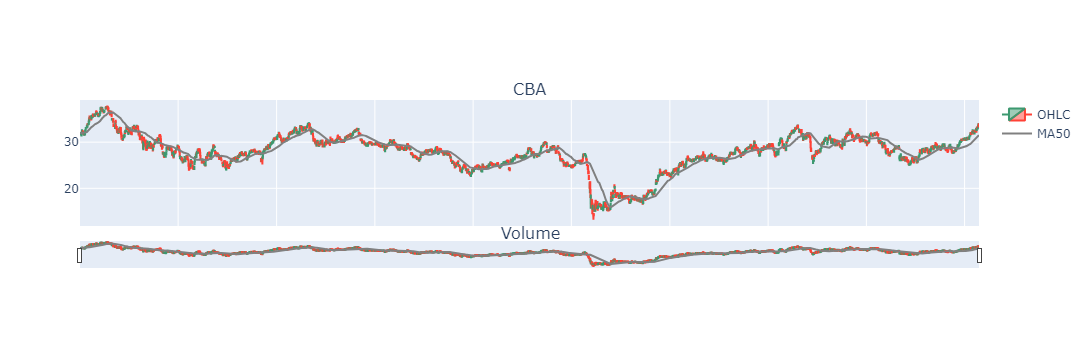

In [8]:
fig.add_trace(gp.Scatter(x = df.index, y = df['MA50'], marker_color = 'grey',name = 'MA50'),row = 1, col = 1)

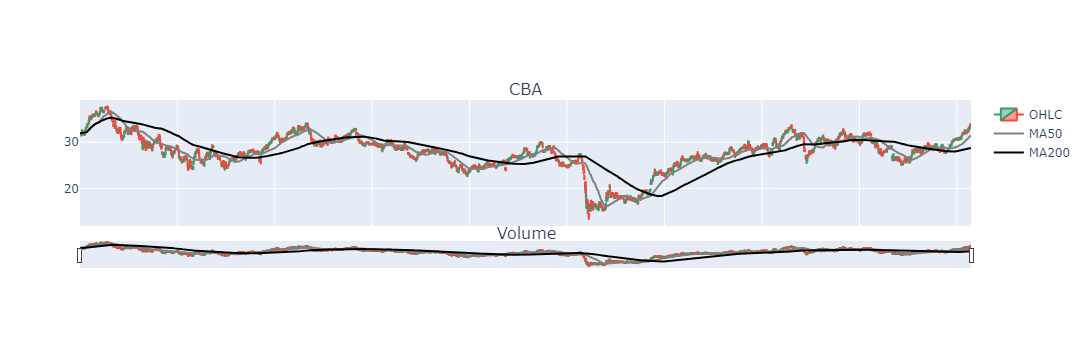

In [9]:
fig.add_trace(gp.Scatter(x = df.index, y = df['MA200'], marker_color = 'light grey',name = 'MA200'),row = 1, col = 1)

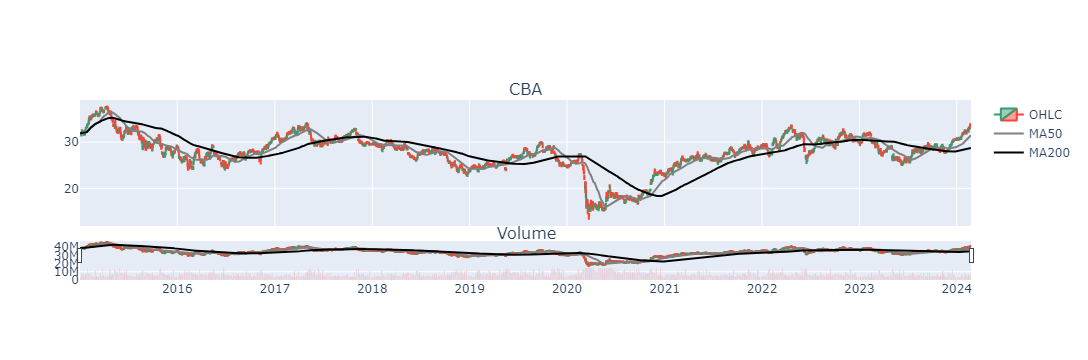

In [10]:
fig.add_trace(gp.Bar(x = df.index, y = df['Volume'],marker_color = 'red',showlegend = False),row = 2,col = 1)

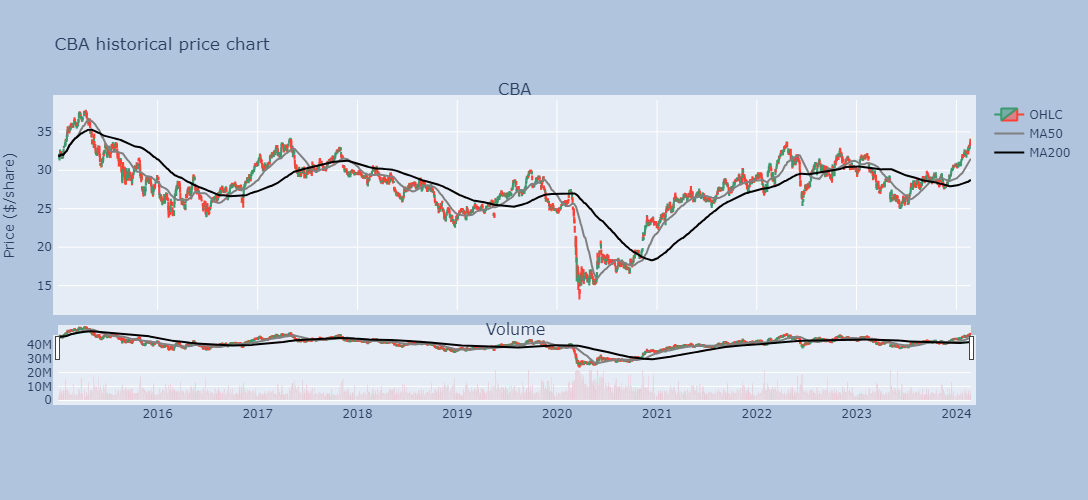

In [11]:
fig.update_layout(
   title = 'CBA historical price chart',
   xaxis_tickfont_size = 12,
   yaxis = dict(
     title = 'Price ($/share)',
     title_font_size = 14,
     tickfont_size = 12
   ),
  autosize = False,
  width = 800,
  height = 500,
  margin = dict(l = 50 , r = 50 , t = 100, b = 100, pad = 5),
  paper_bgcolor = 'lightsteelBlue'
)

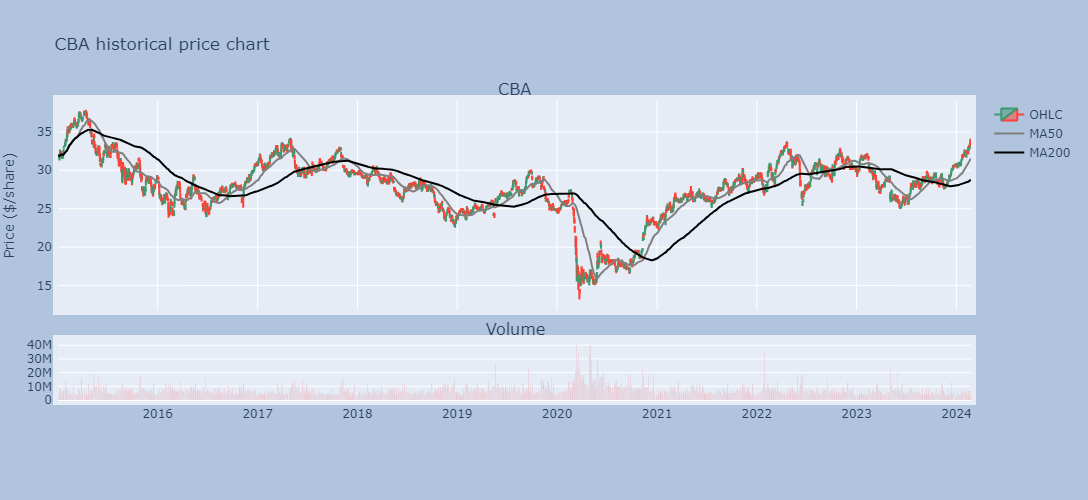

In [12]:
fig.update(layout_xaxis_rangeslider_visible = False)